In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error


In [2]:
data = pd.read_excel(r"C:\Users\kriti\kriti python\Hourly Patient Data.xlsx")

In [3]:
data['Time'] = pd.to_datetime(data['Time'])

In [4]:
data.set_index('Time', inplace=True)

In [5]:
data.drop(columns=['ESI 3', 'ESI 2', 'ESI 4', 'ESI 5'], inplace=True)

In [6]:
esi1_daily = data['ESI 1'].resample('D').sum()

In [7]:
esi1_daily_df = esi1_daily.reset_index()

In [8]:
esi1_daily_df.columns = ['Date', 'ESI 1']

In [9]:
print(esi1_daily_df)

           Date  ESI 1
0    2017-01-01      6
1    2017-01-02      5
2    2017-01-03      5
3    2017-01-04      5
4    2017-01-05      2
...         ...    ...
1456 2020-12-27     13
1457 2020-12-28     11
1458 2020-12-29      2
1459 2020-12-30      8
1460 2020-12-31      5

[1461 rows x 2 columns]


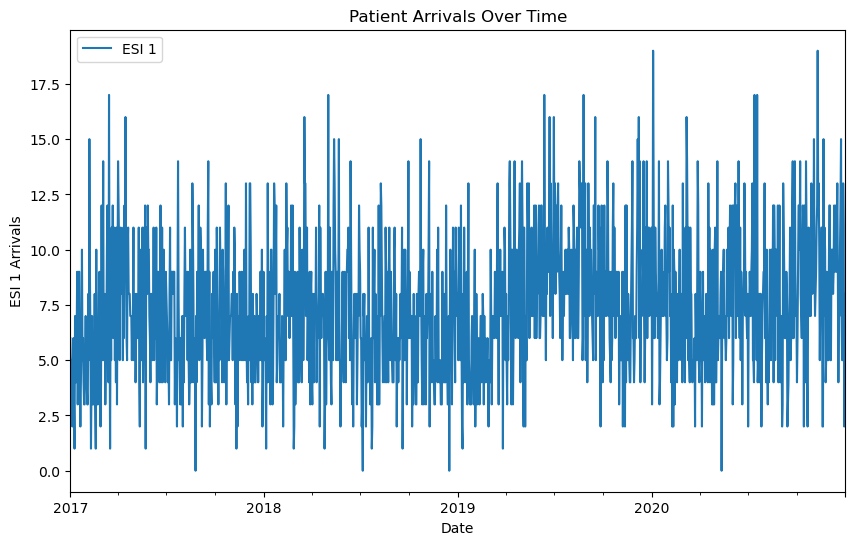

In [10]:
esi1_daily_df.plot(x='Date', y='ESI 1', figsize=(10, 6))
plt.title('Patient Arrivals Over Time')
plt.xlabel('Date')
plt.ylabel('ESI 1 Arrivals')
plt.show()

In [11]:
train_size = int(len(esi1_daily_df) * 0.9)  
train, test = esi1_daily_df.iloc[:train_size], esi1_daily_df.iloc[train_size:]

In [12]:
model = auto_arima(train['ESI 1'], seasonal=True, m=7,
                   start_p=1, start_q=1, start_P=1, start_Q=1,
                   max_p=5, max_q=5, max_P=5, max_Q=5,
                   d=None, D=None, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[7] intercept   : AIC=inf, Time=1.85 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=7392.175, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=7080.626, Time=0.16 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=6613.836, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=7390.175, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=6612.825, Time=0.20 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=6613.795, Time=0.59 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=inf, Time=1.44 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=6610.929, Time=0.26 sec
 ARIMA(1,1,1)(1,0,0)[7] intercept   : AIC=6612.157, Time=0.51 sec
 ARIMA(1,1,1)(0,0,1)[7] intercept   : AIC=6612.192, Time=0.57 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=7080.180, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[7] intercept   : AIC=6612.463, Time=0.39 sec
 ARIMA(1,1,2)(0,0,0)[7] intercept   : AIC=6612.535, Time=0.69 sec
 ARIMA(0,1,2)(0,0,0)[7] intercept   : AIC=6

In [13]:
n_periods = len(test)
forecast_values = model.predict(n_periods=n_periods)

In [14]:
print("Forecasted values:")
print(forecast_values)

Forecasted values:
1314    7.529659
1315    7.696652
1316    7.696652
1317    7.696652
1318    7.696652
          ...   
1456    7.696652
1457    7.696652
1458    7.696652
1459    7.696652
1460    7.696652
Length: 147, dtype: float64


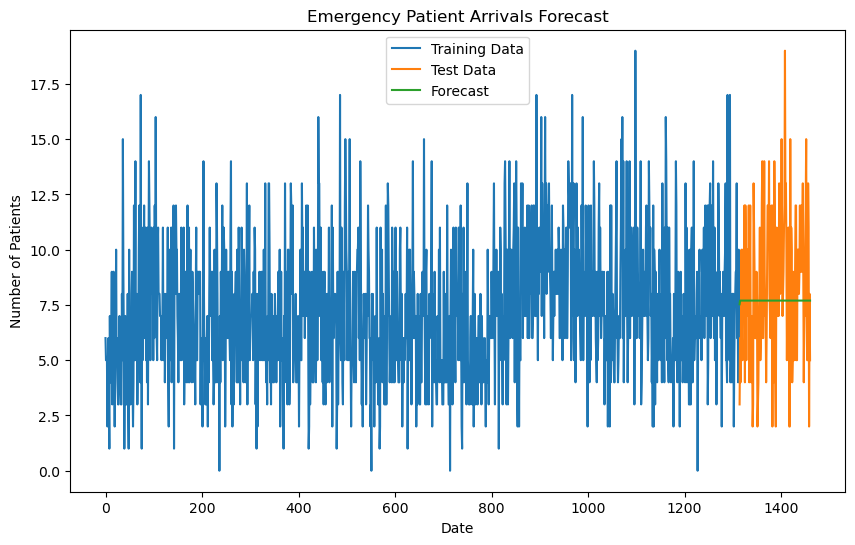

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['ESI 1'], label='Training Data')
plt.plot(test.index, test['ESI 1'], label='Test Data')
plt.plot(test.index, forecast_values, label='Forecast')
plt.title('Emergency Patient Arrivals Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Patients')
plt.legend()
plt.show()

In [16]:
def mean_absolute_percentage_error(actual, forecast):
  
   
    actual, forecast = np.array(actual), np.array(forecast)
    return np.mean(np.abs((actual - forecast) / actual)) * 100

In [17]:
mape = mean_absolute_percentage_error(test['ESI 1'], forecast_values)
print("MAPE:", mape)

MAPE: 46.101911958259976


In [18]:
def root_mean_squared_error(actual, forecast):
    
    actual, forecast = np.array(actual), np.array(forecast)
    return np.sqrt(np.mean((actual - forecast) ** 2))

In [19]:
rmse = root_mean_squared_error(test['ESI 1'], forecast_values)
print("RMSE:", rmse)

RMSE: 3.415857509591779


In [20]:
import numpy as np

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))


mae = mean_absolute_error(test['ESI 1'], forecast_values)
print("MAE:", mae)

MAE: 2.841021145827882
